<a href="https://colab.research.google.com/github/alefaurelio/Reducao_de_dimensionalidade/blob/main/Reducao_de_dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import matplotlib.pyplot as plt
import numpy as np

In [68]:
import cv2

# === ETAPA 1: Carregar imagem com OpenCV e visualizá-la com o Matplotlib ===

image_path = '/content/test/image_test.jpg'  # SUBSTITUA PELO CAMINHO DA IMAGEM QUE VOCÊ QUER TRABALHAR

# === OpenCV lê em BGR, por isso convertemos para RGB
imagem_bgr = cv2.imread(image_path)
imagem_rgb = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2RGB)

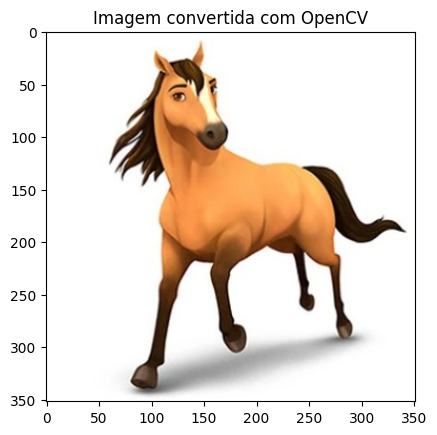

In [69]:
# ===  Visualização com matplotlib  ===

try:
    if imagem_rgb is not None:
       plt.imshow(imagem_rgb)
       plt.title("Imagem convertida com OpenCV")
       plt.show()
except ImportError:
    print("Matplotlib não está instalado. Instale com 'pip install matplotlib' para visualizar a imagem.")

In [70]:
# === ETAPA 2: Converter para tons de cinza manualmente ===
def rgb_para_cinza_manual(imagem_rgb):
    altura = len(imagem_rgb)
    largura = len(imagem_rgb[0])
    imagem_cinza = []

    for y in range(altura):
        linha = []
        for x in range(largura):
            r, g, b = imagem_rgb[y][x]
            cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
            linha.append(cinza)
        imagem_cinza.append(linha)

    return imagem_cinza

imagem_cinza = rgb_para_cinza_manual(imagem_rgb)

In [71]:
# === ETAPA 3: Binarização ===
def binarizar_imagem(imagem_cinza, limiar=127):
    imagem_binaria = []
    for linha in imagem_cinza:
        nova_linha = []
        for pixel in linha:
            binario = 255 if pixel > limiar else 0
            nova_linha.append(binario)
        imagem_binaria.append(nova_linha)
    return imagem_binaria

imagem_binaria = binarizar_imagem(imagem_cinza)

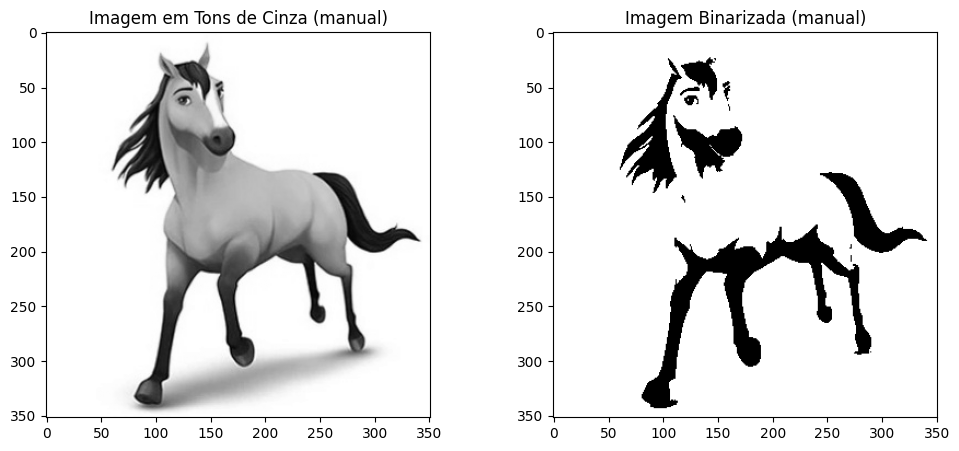

In [72]:
# === ETAPA 4: Visualização com matplotlib  ===


# Convertendo para arrays para visualização
imagem_cinza_np = np.array(imagem_cinza, dtype=np.uint8)
imagem_binaria_np = np.array(imagem_binaria, dtype=np.uint8)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Imagem em Tons de Cinza (manual)")
plt.imshow(imagem_cinza_np, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Imagem Binarizada (manual)")
plt.imshow(imagem_binaria_np, cmap='gray')

plt.show()
